# Implémentation de l'algorithme kmeans de zéro
## Linda Belkessa (2CS SIQ3) : Ecole Nationale Supérieure d'Inforamtique - Alger
### Introduction 

Plusieurs algorithmes pour éffectuer la classification automatique des données, le plus simple à mettre en oeuvre voir le plus connu c'est l'algorithme des kmeans qui est une variante de "l'algorithme des centres mobiles" inventé en 1965 par Foggy.

Dans ce qui suit, j'implémente le processus sans utiliser la fonction de sci-kit learn.


### Principe et étapes :
> #### Etape 01 : Initialisation des centroids :
> En premier, nous initialisons en utilisant une fonction pseudo-aléatoire les centroids à des k points du jeu de données, k étant fixé au départ
> #### Etape 02 : Affectation des points du jeu de données
> Chaque centroid définit à priori une classe, chaque point sera associé au centroid le plus proche i.e dont la distance Euclidienne est minimale
> #### Etape 03 : Mise à jour des centroids
> après chaque affectation on recalcule les centroids qui sont pris comme étant la moyenne des éléments d'une meme classe, on réitère le processus N fois, ce dernier est le nombre d'itérations et est ficé au départ aussi



In [1]:
import numpy as np
from scipy.spatial.distance import cdist 

In [2]:
#Implémentation des kmeans 
def kmeans(data, k, nb_iterations):
    #Initialiser aléatoirement des centroides
    classes = np.random.choice(len(data), k)
    centroids = data[classes]
    
    #Calculer la distance entre les points Data et les centroids
    #Associer chaque point au centroid le plus proche 
    
    distances = cdist(data, centroids, 'euclidean')
    data_classify = np.array([np.argmin(i) for i in distances])
    
    #Ré-itérer le processus selon le nombre d'itérations 
    for itr in range(nb_iterations):
        centroids = []
        for classes in range(k):
            class_mean = data[data_classify==classes].mean(axis=0)
            centroids.append(class_mean)
        
        distances = cdist(data, centroids, 'euclidean')
        data_classify = np.array([np.argmin(i) for i in distances])
    
    
    return data_classify

#### Dans ce qui suit, nous utilisons les dataset de sklearn comme jeu de données
#### Remarque :
> Il existe plusieurs critères de séléction du k (nombre de partitions), on peut se contenter de mesurer l'inértie totale en fonction de ce dernier pout le fixer 
> Il est aussi à noter que l'algorithme des kmeans cherche plutot à maximiser l'inértie intra-classe et minimiser au mieux l'inértie inter-classe 

C:\Users\Linda Belkessa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


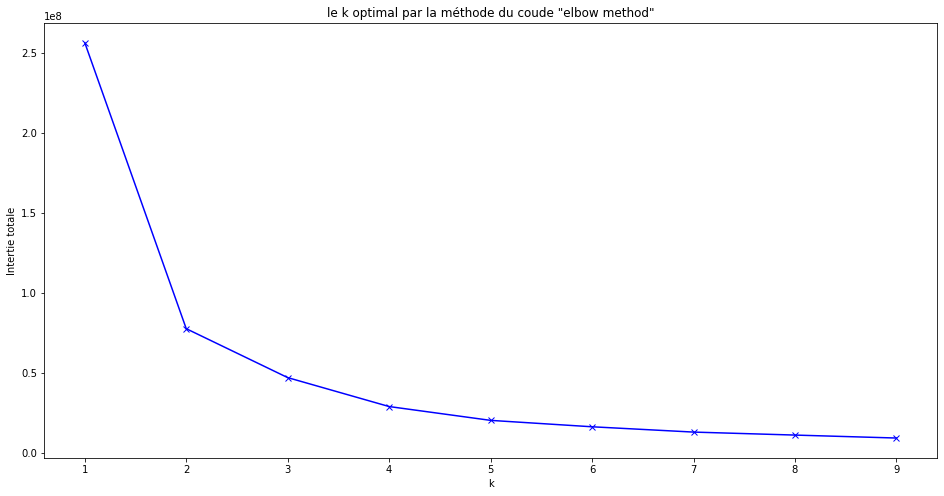

In [18]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits, load_breast_cancer, load_diabetes
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


#Charger le dataset (jeu de données)
#data = load_diabetes().data
#elements = load_diabetes()
#data = load_digits().data
#elements = load_digits()

data = load_breast_cancer().data
elements = load_breast_cancer()

#Effectuer une ACP pour réduire les dimensions, pour des soucis de visualisation
pca = PCA(2)
  
df = pca.fit_transform(data)




#Choix du nombre de classes optimal selon l'inértie totale
inertie_totale = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    inertie_totale.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inertie_totale, 'bx-')
plt.xlabel('k')
plt.ylabel('Intertie totale')
plt.title('le k optimal par la méthode du coude "elbow method"')
plt.show()

#### Dans ce qui suit, on compare la classification obtenue en utilisant l'algorothme et la visualisation des donées selon les labels (étiquettes) fournies dans le data-set lui-meme.

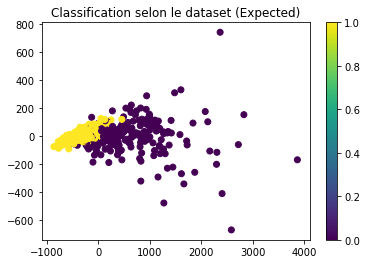

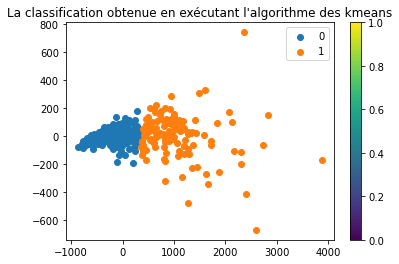

In [19]:
plt.scatter(df[:, 0], df[:, 1], c=elements.target)
plt.colorbar()
plt.title('Classification selon le dataset (Expected)')
plt.show()


label = kmeans(df,2,2000)
 

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    
plt.legend()
plt.colorbar()
plt.title('La classification obtenue en exécutant l\'algorithme des kmeans' )
plt.show()